In [38]:
import numpy as np
import os
from matplotlib import pyplot as plt
import cv2
import random
import pickle
from PIL import Image


file_list = []
class_list = []

DATADIR = "shapes"

# All the categories you want your neural network to detect
CATEGORIES = ['1','2','3','4','5','6','7','8','9','circles','squares','triangles']

# The size of the images that your neural network will use
IMG_SIZE = 48

# Checking or all images in the data folder
for category in CATEGORIES :
	path = os.path.join(DATADIR, category)
	for img in os.listdir(path):
		img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)

training_data = []

def create_training_data():
	for category in CATEGORIES :
		path = os.path.join(DATADIR, category)
		class_num = CATEGORIES.index(category)
		for img in os.listdir(path):
			try :
				img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
				new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
				training_data.append([new_array, class_num])
			except Exception as e:
				pass

create_training_data()

random.shuffle(training_data)

X = [] #features
y = [] #labels

for features, label in training_data:
	X.append(features)
	y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

# Creating the files containing all the information about your model
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

Train on 4248 samples, validate on 1063 samples
Epoch 1/40
4248/4248 [==============================] - 8s 2ms/step - loss: 1.5764 - acc: 0.4520 - val_loss: 0.6515 - val_acc: 0.7742
Epoch 2/40
4248/4248 [==============================] - 3s 816us/step - loss: 0.5833 - acc: 0.7968 - val_loss: 0.4384 - val_acc: 0.8354
Epoch 3/40
4248/4248 [==============================] - 3s 822us/step - loss: 0.4520 - acc: 0.8366 - val_loss: 0.3324 - val_acc: 0.8796
Epoch 4/40
4248/4248 [==============================] - 4s 826us/step - loss: 0.3600 - acc: 0.8691 - val_loss: 0.3170 - val_acc: 0.8777
Epoch 5/40
4248/4248 [==============================] - 3s 809us/step - loss: 0.3248 - acc: 0.8887 - val_loss: 0.2631 - val_acc: 0.9022
Epoch 6/40
4248/4248 [==============================] - 4s 876us/step - loss: 0.2643 - acc: 0.9087 - val_loss: 0.2757 - val_acc: 0.9040
Epoch 7/40
4248/4248 [==============================] - 4s 830us/step - loss: 0.2337 - acc: 0.9202 - val_loss: 0.2407 - val_acc: 0.9182
Ep

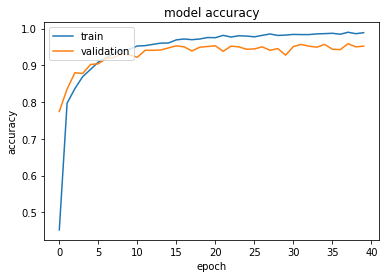

In [42]:

import tensorflow as tf 
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
from keras.models import model_from_json
from keras.models import load_model
import matplotlib.pyplot as plt

# Opening the files about data
X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))

# normalizing data (a pixel goes from 0 to 255)
X = X/255.0

# Building the model
model = Sequential()
# 3 convolutional layers
model.add(Conv2D(32, (3, 3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 2 hidden layers
model.add(Flatten())
model.add(Dense(128))
model.add(Activation("relu"))

model.add(Dense(128))
model.add(Activation("relu"))

# The output layer with 13 neurons, for 13 classes
model.add(Dense(12))
model.add(Activation("softmax"))

# Compiling the model using some basic parameters
model.compile(loss="sparse_categorical_crossentropy",
				optimizer="adam",
				metrics=["accuracy"])

# Training the model, with 40 iterations
# validation_split corresponds to the percentage of images used for the validation phase compared to all the images
history = model.fit(X, y, batch_size=32, epochs=40, validation_split=0.2)

# Saving the model
model_json = model.to_json()
with open("model.json", "w") as json_file :
	json_file.write(model_json)

model.save_weights("model.h5")
print("Saved model to disk")

model.save('CNN.model')

# Printing a graph showing the accuracy changes during the training phase
print(history.history.keys())
plt.figure(1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')



In [28]:
import cv2
import tensorflow as tf
from PIL import Image
CATEGORIES = ['1','2','3','4','5','6','7','8','9','circles','squares','triangles']
def prepare(file):
    IMG_SIZE = 48
    img_array = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
model = tf.keras.models.load_model("CNN.model")
image =  "/home/mj/Desktop/shapes_new/test/Destination_path.png"
image = prepare(image)
prediction = model.predict([image])
prediction = list(prediction[0])
print(prediction)
print(CATEGORIES[prediction.index(max(prediction))],end = " ")

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]
squares 